In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

#画图魔术贴
%matplotlib inline

# 数据预处理

In [6]:
df = pd.read_excel('碳交易均价.xlsx')
df = df[:-2]
df['time'] = pd.to_datetime(df['time']).dt.normalize()
df

,time,深圳(SZA),北京(BEA),上海(SHEA),广东(GDEA),重庆(CQEA),天津(TJEA),湖北(HBEA),深圳碳排放权(SZA):收盘价,上海碳排放权配额(SHEA):收盘价,...,广东碳排放权配额(GDEA):收盘价,福建碳排放权(FJEA):收盘价,深圳碳排放权(SZA):当日成交量,北京碳排放权(BEA):当日成交量,上海碳排放权配额(SHEA):当日成交量,广东碳排放权配额(GDEA):当日成交量,福建碳排放权(FJEA):当日成交量,湖北碳排放权(HBEA):当日成交量,天津碳排放权(TJEA):当日成交量,重庆碳排放权(CQEA):当日成交量
0,2013-06-18,29.00,NaN,NaN,NaN,NaN,NaN,NaN,28.00,NaN,...,NaN,NaN,21112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-08-05,37.57,NaN,NaN,NaN,NaN,NaN,NaN,38.00,NaN,...,NaN,NaN,7000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-08-08,40.00,NaN,NaN,NaN,NaN,NaN,NaN,40.00,NaN,...,NaN,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-08-09,40.00,NaN,NaN,NaN,NaN,NaN,NaN,40.00,NaN,...,NaN,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-08-12,41.67,NaN,NaN,NaN,NaN,NaN,NaN,42.00,NaN,...,NaN,NaN,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2013-08-14,41.50,NaN,NaN,NaN,NaN,NaN,NaN,42.00,NaN,...,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2013-08-15,43.00,NaN,NaN,NaN,NaN,NaN,NaN,43.00,NaN,...,NaN,NaN,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2013-08-20,43.00,NaN,NaN,NaN,NaN,NaN,NaN,43.00,NaN,...,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2013-08-22,45.00,NaN,NaN,NaN,NaN,NaN,NaN,45.00,NaN,...,NaN,NaN,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2013-08-23,47.50,NaN,NaN,NaN,NaN,NaN,NaN,48.00,NaN,...,NaN,NaN,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# 取前八个城市的碳交易均价
df1 = df.iloc[1000:, :8]
df1 = df1.set_index('time')
df1.head()

,深圳(SZA),北京(BEA),上海(SHEA),广东(GDEA),重庆(CQEA),天津(TJEA),湖北(HBEA)
time,,,,,,,
2017-09-07,NaN,NaN,27.0,13.50,5.33,NaN,12.85
2017-09-08,NaN,NaN,NaN,12.86,4.26,NaN,12.95
2017-09-11,25.49,NaN,NaN,13.50,3.41,NaN,12.87
2017-09-12,NaN,NaN,NaN,13.50,3.00,NaN,12.99
2017-09-13,21.15,NaN,27.0,13.49,2.50,NaN,12.92


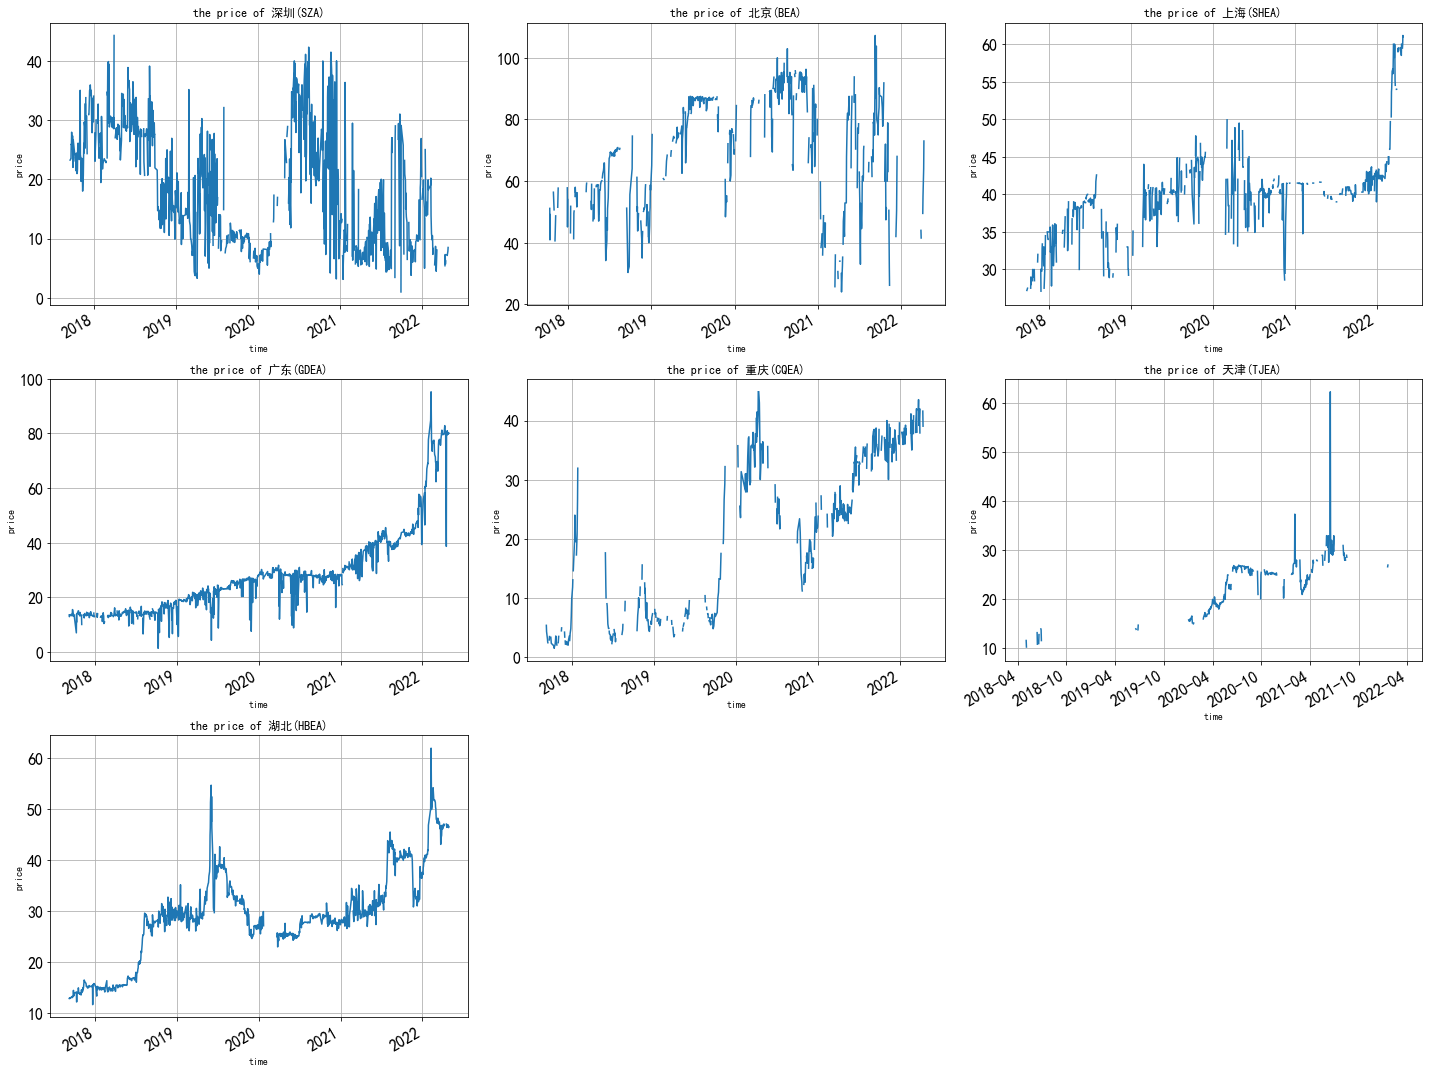

In [8]:
# 绘图观察，可以发现湖北的数据较为连续，于是选取湖北的碳交易价格来进行预测
plt.figure(figsize=(20, 15))

for i in range(7):
    plt.subplot(3, 3, i+1)
    df1.iloc[:, i].plot(fontsize=16)
    plt.ylabel('price')
    plt.xticks(rotation=30)
    plt.grid(True)
    plt.title(f'the price of {df1.columns[i]}')

plt.subplots_adjust()
plt.tight_layout()

In [9]:
data=df1['湖北(HBEA)']
data.head()

time
2017-09-07    12.85
2017-09-08    12.95
2017-09-11    12.87
2017-09-12    12.99
2017-09-13    12.92
Name: 湖北(HBEA), dtype: float64

False


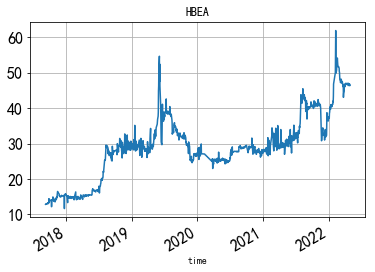

In [11]:
#对数据进行插值处理
print(data.isnull().any())

data.interpolate(method='linear',limit_direction="both",inplace=True)
data.plot(grid=True,title='HBEA',fontsize=16)

# 单LSTM预测

In [12]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'keras'


The following command must be run outside of the IPython shell:

    $ pip install sklearn

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [16]:
data = data.to_frame()

In [17]:
#数据归一化
scaler = MinMaxScaler(feature_range=(0,1))
# scaled_data = scaler.fit_transform(dataset)
data['湖北(HBEA)'] = scaler.fit_transform(data[['湖北(HBEA)']])
data

NameError: name 'MinMaxScaler' is not defined

In [19]:
#划分训练集与测试集
train_data = data.query('time < "2021-01-01"').reset_index().set_index('time')
test_data = data.query('time >= "2021-01-01"').reset_index().set_index('time')
train_data

,湖北(HBEA)
time,
2017-09-07,12.85
2017-09-08,12.95
2017-09-11,12.87
2017-09-12,12.99
2017-09-13,12.92
2017-09-14,13.04
2017-09-15,13.08
2017-09-18,13.10
2017-09-19,13.19


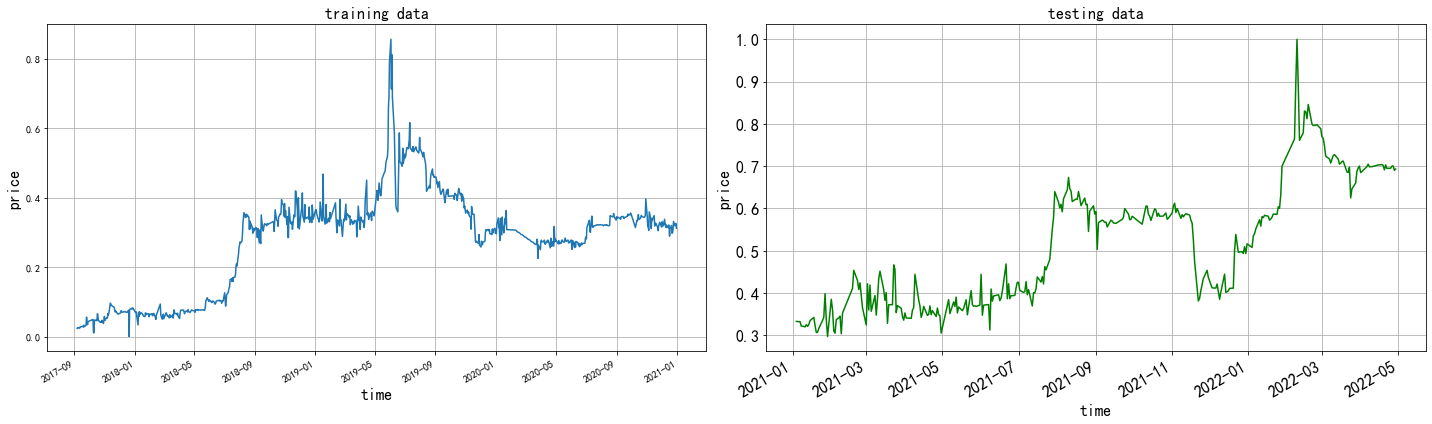

In [311]:
plt.figure(figsize=(20,6))
plt.subplot(121)
train_data['湖北(HBEA)'].plot()
plt.grid(True)
plt.xlabel('time',fontsize=16)
plt.ylabel('price',fontsize=16)
plt.title('training data',fontsize=16)
plt.subplot(122)
data['湖北(HBEA)'].plot(c='green',fontsize=16)
plt.grid(True)
plt.xlabel('time',fontsize=16)
plt.ylabel('price',fontsize=16)
plt.title('testing data',fontsize=16)
plt.tight_layout()

In [260]:
#开始预测
trainset = train_data['湖北(HBEA)'].values.reshape(
                                    (len(train_data['湖北(HBEA)']),1))
testset = test_data['湖北(HBEA)'].values.reshape(
                                    (len(test_data['湖北(HBEA)']),1))

from keras.preprocessing.sequence import TimeseriesGenerator

#设置步长为20
look_back=20

train_generator = TimeseriesGenerator(trainset, trainset,
                                      length        = look_back, 
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 10)

test_generator = TimeseriesGenerator(testset, testset,
                                      length        = look_back, 
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 10)

#建立lstm model
model = Sequential()
model.add(LSTM(128, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse');

model.fit(train_generator,epochs=300, verbose=0);
test_prediction = model.predict(test_generator)

In [283]:
#模型评价

#RMSE
rmse = np.sqrt(np.mean(((test_presiction - testset[20:]) ** 2)))
rmse

#MAPE
def  mape(y_test, predictions): 
    return np.mean(np.abs((predictions-y_test) / y_test)) * 100
mape = mape(testset[20:], test_prediction)

print(rmse,mape)

0.054884118495204984 5.567242414953618


Text(0.5, 1.0, '湖北碳价格 LSTM 预测')

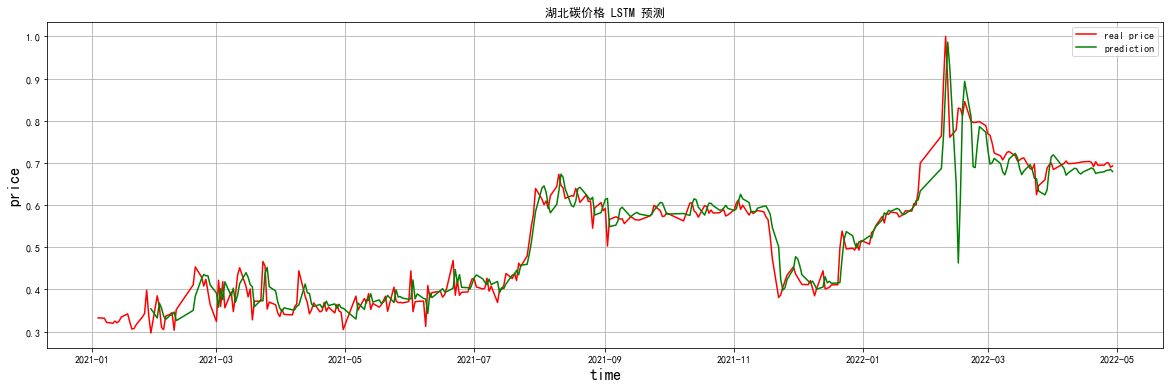

In [305]:
#可视化处理
plt.figure(figsize=(20,6))

plt.plot(test_data.index,test_data['湖北(HBEA)'],c='r',
         linestyle='-',label='real price')
plt.plot(test_data.index[20:],test_prediction,c='g',
         linestyle='-',label='prediction')
plt.legend()
plt.xlabel('time',fontsize=16)
plt.ylabel('price',fontsize=16)
plt.grid(True)
plt.title('湖北碳价格 LSTM 预测')

In [15]:
!pip install statsmodels

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 22.1b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# 单arima/sarima模型预测

In [307]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [309]:
#平稳性检验ADF检验，接受非平稳
result = adfuller(data)
print('ADF Statistic:%f' % result[0])
print('p-value:%f' % result[1])

ADF Statistic:-1.552220
p-value:0.507539


ADF Statistic:-12.766218
p-value:0.000000


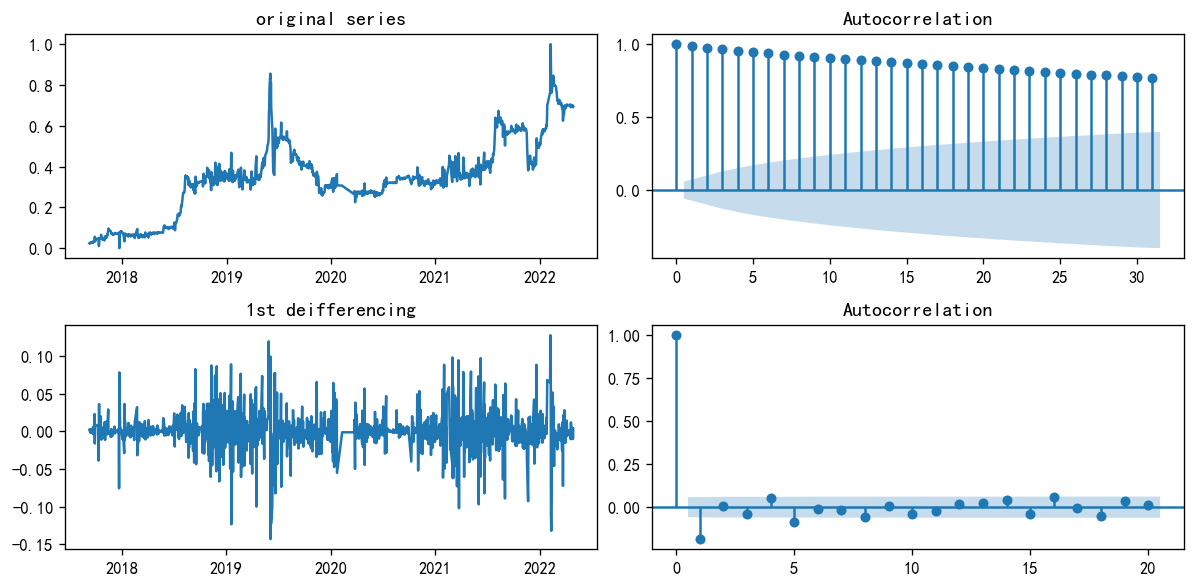

In [339]:
# 差分difference

result = adfuller(data.diff().dropna())
print('ADF Statistic:%f' % result[0])
print('p-value:%f' % result[1])

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# original series
fig,axes =plt.subplots(2,2,figsize=(10,5))
axes[0,0].plot(data)
axes[0,0].set_title('original series')
plot_acf(data,ax=axes[0,1],)

#1st differencing，由ACF图 q 约为1
axes[1,0].plot(data.diff())
axes[1,0].set_title('1st deifferencing')
plot_acf(data.diff().dropna(),ax=axes[1,1],lags=20)

fig.subplots_adjust(hspace=0.5)
plt.tight_layout()

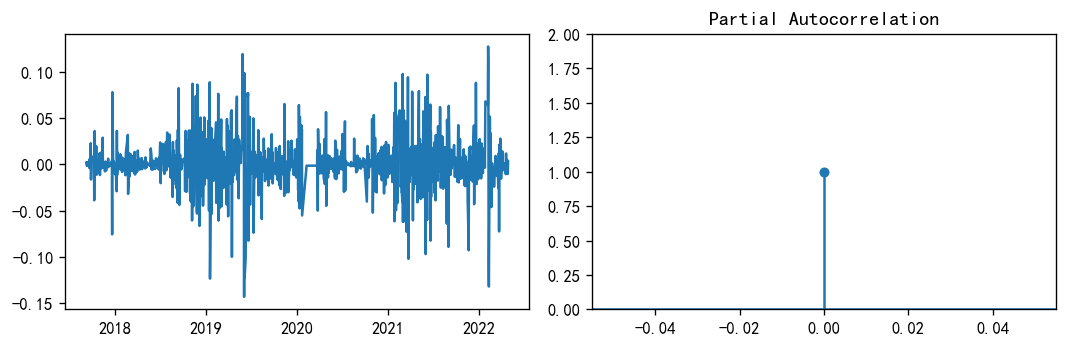

In [337]:
#PACF plot of 1sf differenced series to find p(AR term),p 为0
plt.rcParams.update({'figure.figsize':(9,3),'figure.dpi':120})

fig,axes=plt.subplots(1,2)
axes[0].plot(data.diff())
# axes[0].set_title('1st deifferencing')
axes[1].set(ylim=(0,2))
plot_pacf(data.diff(),ax=axes[1],lags=20)
plt.tight_layout()

In [326]:
#bic准则来确定 p、q 为(0,1)
from statsmodels.tsa.stattools import arma_order_select_ic as ic

ic(data.diff().dropna(),max_ar=6,max_ma=6,ic='bic')['bic_min_order']

D:\anacanda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\anacanda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\

(0, 1)

In [340]:
#网上找的包装为函数的代码
from math import sqrt

def check_stationarity(y, lags_plots=20, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Rio de Janeiro Temperature Variation')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe serie seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe serie isn't stationary")

D:\anacanda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Results of Dickey-Fuller Test:
Test Statistic                  -12.7662
p-value                           0.0000
Lags Used                        10.0000
Number of Observations Used    1120.0000
Critical Value (1%)              -3.4362
Critical Value (5%)              -2.8641
Critical Value (10%)             -2.5681
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


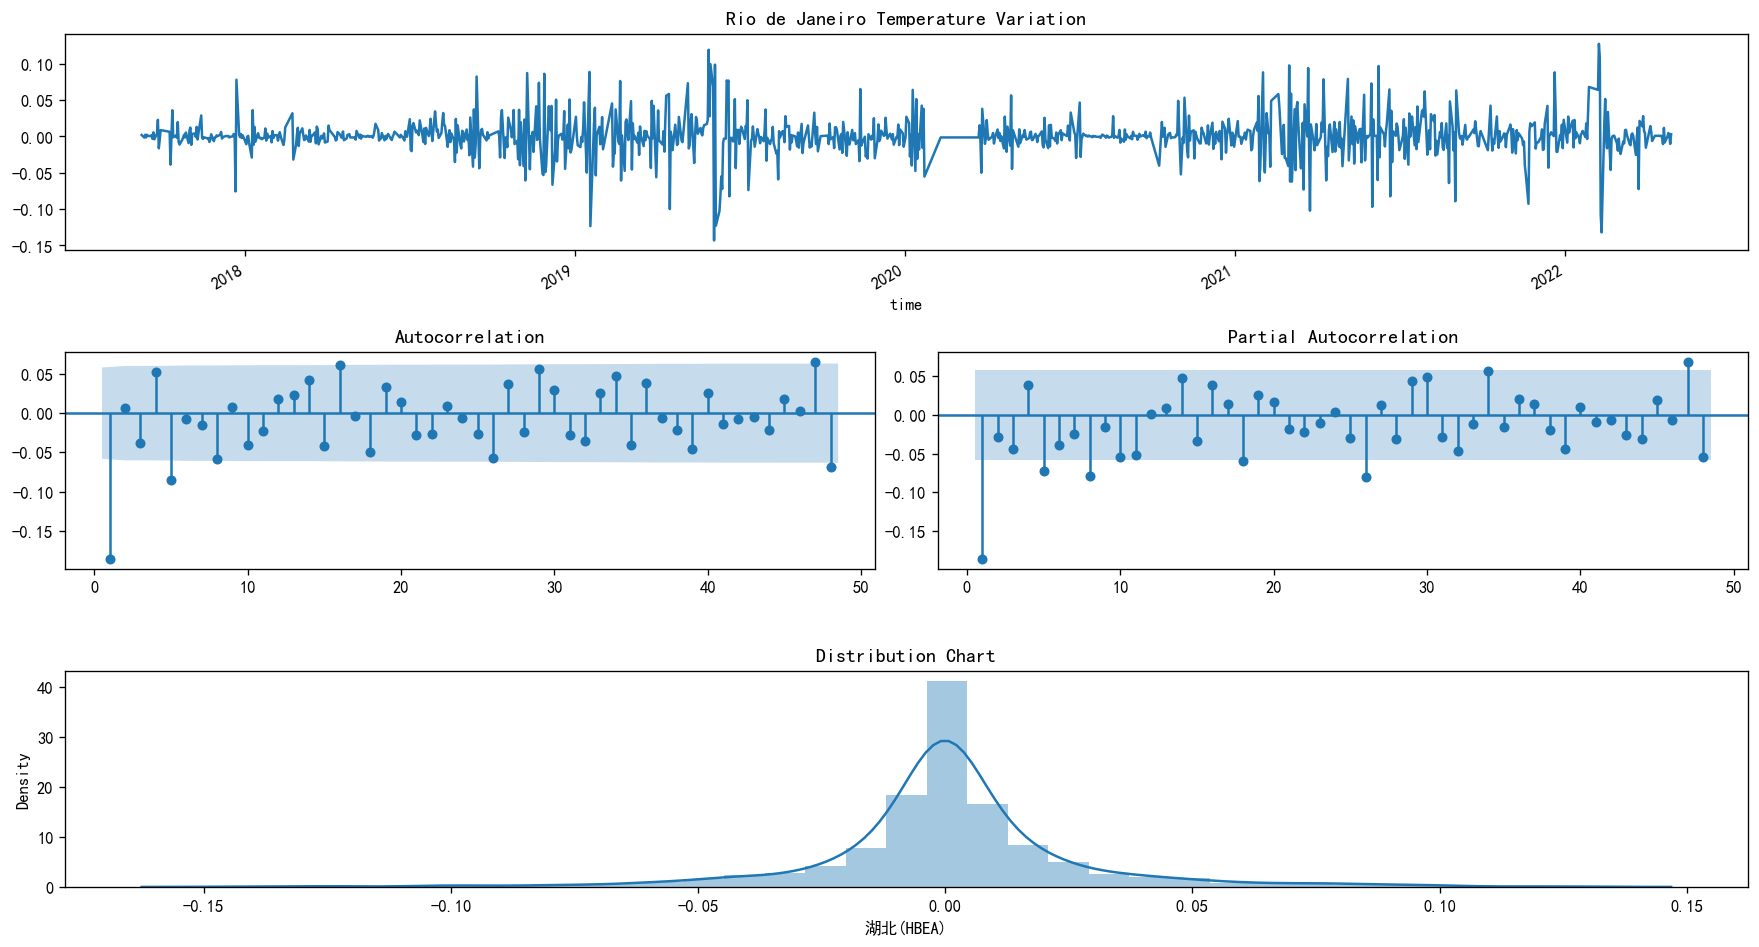

In [333]:
check_stationarity(data['湖北(HBEA)'].diff().dropna())

In [351]:
#网上找的打包函数2，画了qq图

import statsmodels.api as sm
import statsmodels.stats as sms
import scipy.stats as scs

def tsplot(y, lags=None, figsize=(10, 8), style='seaborn-bright'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax, linewidth=1.5)
        ts_ax.set_title('Time Series Analysis Plots')
        plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)
    
        plt.tight_layout()
    
    return

D:\anacanda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


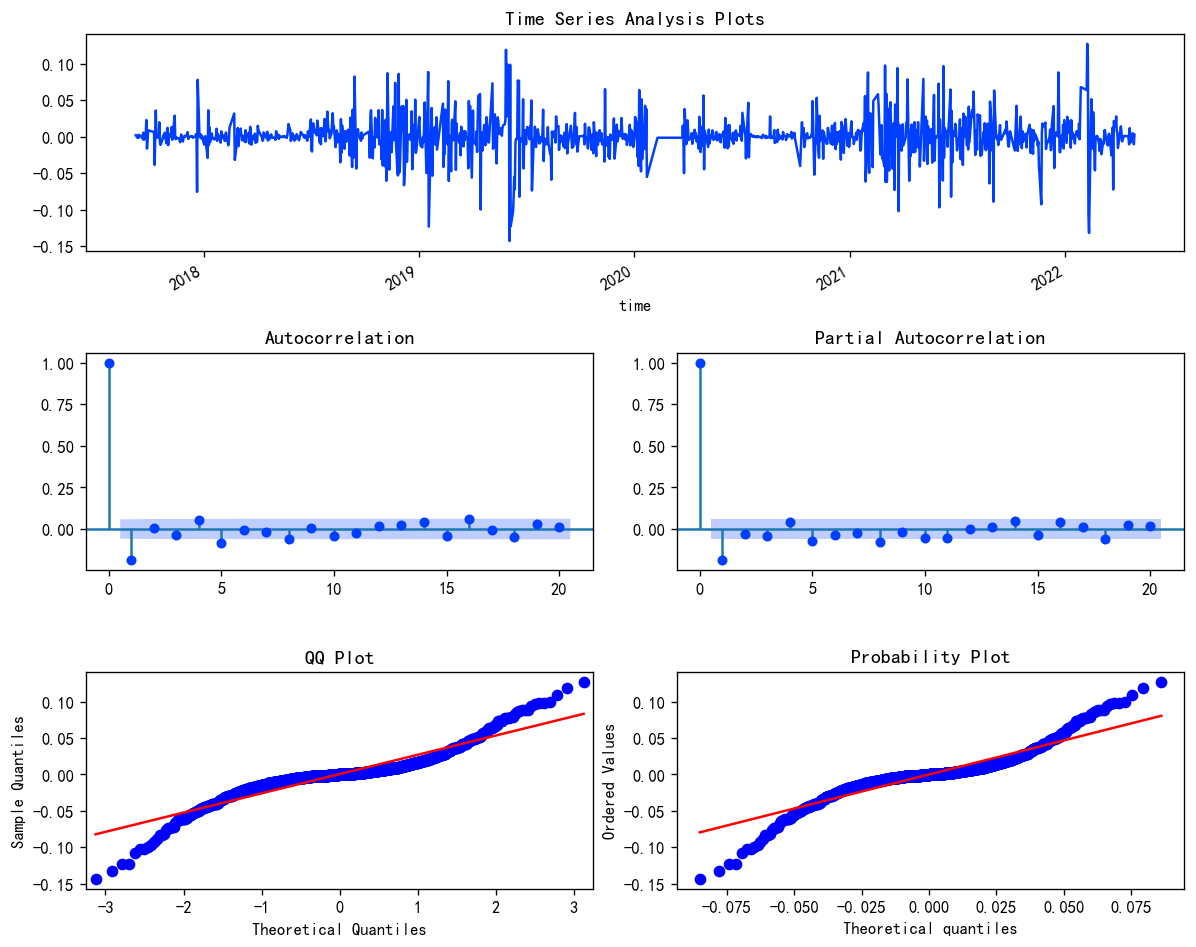

In [352]:
tsplot(data['湖北(HBEA)'].diff().dropna(),lags=20)

In [421]:
#划分训练集

train_len = int(len(data)*0.9)

train_data = data[:train_len+1]
test_data = data[train_len+1:]
arima_model = ARIMA(train_data['湖北(HBEA)'], order = (0,1,1))
arima_result = arima_model.fit()
arima_result.summary()

D:\anacanda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\anacanda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.湖北(HBEA)   No. Observations:                 1018
Model:                 ARIMA(0, 1, 1)   Log Likelihood                2320.905
Method:                       css-mle   S.D. of innovations              0.025
Date:                Tue, 10 May 2022   AIC                          -4635.811
Time:                        00:13:27   BIC                          -4621.034
Sample:                             1   HQIC                         -4630.199
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0005      0.001      0.972      0.331      -0.001       0.002
ma.L1.D.湖北(HBEA)    -0.2713      0.029     -9.263      0.000      -0.329      -0.214
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            3.6859           +0.0000j            3.6859            0.0000
-----------------------------------------------------------------------------
"""

In [442]:
#arima 预测

start = len(train_data)-1
end = len(train_data)+len(test_data)-2
arima_pred, se, conf = arima_result.forecast(113, alpha=0.05)
arima_pred

array([0.58428743, 0.58483712, 0.58538681, 0.5859365 , 0.58648619,
       0.58703589, 0.58758558, 0.58813527, 0.58868496, 0.58923465,
       0.58978434, 0.59033403, 0.59088372, 0.59143341, 0.5919831 ,
       0.59253279, 0.59308248, 0.59363217, 0.59418186, 0.59473155,
       0.59528125, 0.59583094, 0.59638063, 0.59693032, 0.59748001,
       0.5980297 , 0.59857939, 0.59912908, 0.59967877, 0.60022846,
       0.60077815, 0.60132784, 0.60187753, 0.60242722, 0.60297692,
       0.60352661, 0.6040763 , 0.60462599, 0.60517568, 0.60572537,
       0.60627506, 0.60682475, 0.60737444, 0.60792413, 0.60847382,
       0.60902351, 0.6095732 , 0.61012289, 0.61067258, 0.61122228,
       0.61177197, 0.61232166, 0.61287135, 0.61342104, 0.61397073,
       0.61452042, 0.61507011, 0.6156198 , 0.61616949, 0.61671918,
       0.61726887, 0.61781856, 0.61836825, 0.61891795, 0.61946764,
       0.62001733, 0.62056702, 0.62111671, 0.6216664 , 0.62221609,
       0.62276578, 0.62331547, 0.62386516, 0.62441485, 0.62496

In [430]:
#检查残差是否正态分布
from statsmodels.stats.stattools import jarque_bera

score, pvalue, _, _ = jarque_bera(arima_result.resid)
if pvalue < 0.05:
    print("Our residuals are likely not normally distributed.")
else:
    print("Our residuals are likely normally distributed.")

Our residuals are likely not normally distributed.


Text(0.5, 1.0, '湖北碳价格 LSTM 预测')

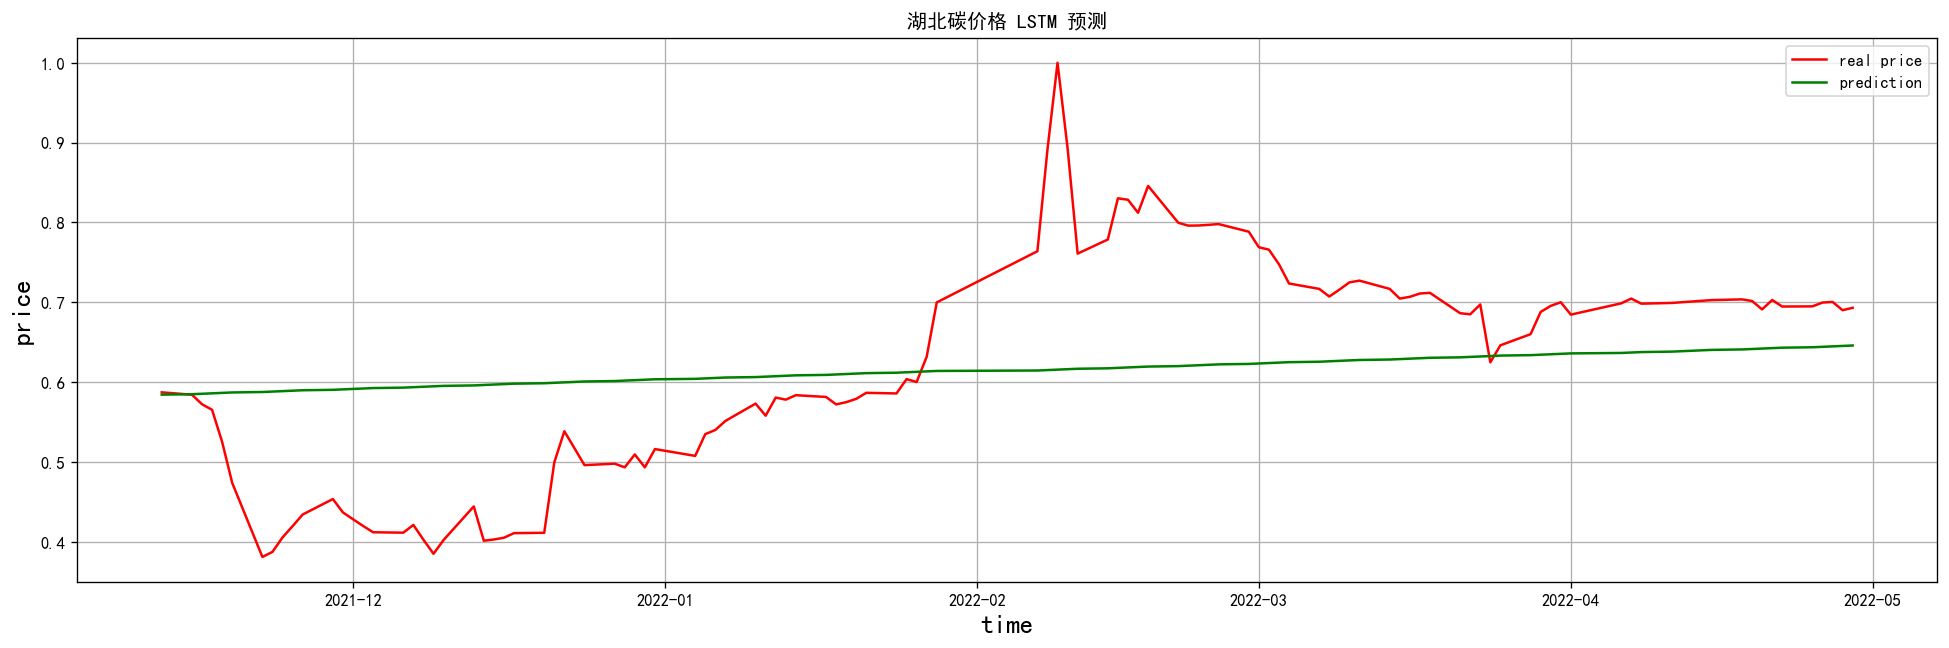

In [431]:
#可视化处理
plt.figure(figsize=(20,6))

plt.plot(test_data.index,test_data['湖北(HBEA)'],c='r',
         linestyle='-',label='real price')
plt.plot(test_data.index,arima_pred,c='g',
         linestyle='-',label='prediction')
plt.legend()
plt.xlabel('time',fontsize=16)
plt.ylabel('price',fontsize=16)
plt.grid(True)
plt.title('湖北碳价格 LSTM 预测')

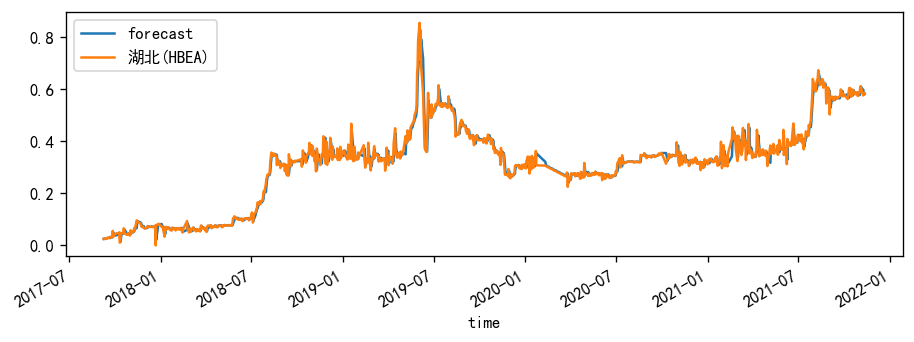

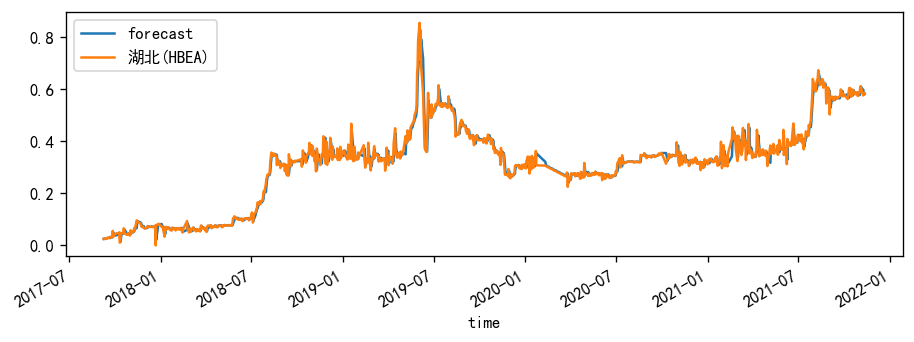

In [419]:
arima_result.plot_predict()

In [444]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
                        # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(arima_pred,test_data['湖北(HBEA)'].values)

{'mape': 0.18221903382409232,
 'me': -0.006519413904754542,
 'mae': 0.10388083661256786,
 'mpe': 0.0390492447917282,
 'rmse': 0.12565553142501845,
 'corr': 0.7256965675257604,
 'minmax': 0.15328429948551503}

# EMD ICEEMDAN分解

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy.signal import hilbert
import numpy  as np

from PyEMD import EMD

ModuleNotFoundError: No module named 'PyEMD'

In [2]:
pip install PyEMD


The following command must be run outside of the IPython shell:

    $ pip install PyEMD

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/
